In [17]:
import pickle
from Sample import Sample
import matplotlib.pyplot as plt
import numpy as np
import math

import seaborn as sns
# from sklearn.datasets import load_digits
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# import pandas as pd
# %matplotlib inline


# Pickle functions
def pickle_sample(sample, path):
    sample_pickle = open(f"{path}/{f.get_param('ID')}_pickle.pickle", "wb")
    pickle.dump(sample, sample_pickle)
    sample_pickle.close()

def unpickle_sample(path):
    sample_pickle =open(path, "rb")
    sample = pickle.load(sample_pickle)
    sample_pickle.close()
    return sample


def df2arr(df):
    # convert Series or DataFrame into numpy array
    return np.array(df.tolist())

#colormap
color_map = sns.color_palette("hls",24)

In [140]:

f: Sample= unpickle_sample("tests/f3/20220426_RM0008_130hpf_fP1_f3_pickle.pickle")
#f: Sample= unpickle_sample("tests/f2/20220511_RM0008_126hpf_fP10_f2_pickle.pickle")
print(f)
f.neuron.head()


20220426_RM0008_130hpf_fP1_f3


,raw_traces,roi_exp_tag,roi_exp_position,roi_exp_plane,dig_err,df_traces,baseline_mean,baseline_std,threshold
0,"[[8151.852287334587, 8139.384996155328, 8146.5...",1,"[[248.39333273428446, 23.656695120468214], [24...",1,"[8125.39128494535, 8125.673898850642, 8125.496...","[[0.2850663644118177, -0.4318500959225006, 0.0...","[1.0515398076092553e-14, -8.075154301847998e-1...","[0.1399443331057725, 0.24533606158726529, 0.23...","[0.28385644679582944, 0.43460857647122364, 0.4..."
1,"[[8150.588368, 8141.56034757653, 8147.49930245...",2,"[[217.2940734750252, 22.684235481341915], [217...",1,"[8125.595642432204, 8125.650960049199, 8125.52...","[[0.33800040927640673, -0.21090570893409777, 0...","[-3.013726834226526e-14, 3.222818837197597e-14...","[0.1664291690968692, 0.1999996879086681, 0.198...","[0.31308570531550256, 0.4173934086045752, 0.40..."
2,"[[8143.418429876282, 8146.324965373964, 8156.2...",4,"[[238.5325919935437, 47.48195627906273], [238....",1,"[8125.510102570438, 8125.684383656509, 8125.54...","[[-0.144155094977842, -0.07005785534073403, 0....","[3.725591264063561e-14, 5.852461372666897e-15,...","[0.18182708743921594, 0.26407697871995417, 0.2...","[0.361959249882342, 0.46823576793336885, 0.572..."
3,"[[8137.314164848965, 8138.394619617433, 8136.4...",6,"[[265.4599994009511, 66.93114906158883], [265....",1,"[8125.514787120848, 8125.766966547295, 8125.28...","[[-0.5309256870121831, -0.500543946662474, -0....","[2.926759363964222e-14, -5.1361031829682834e-1...","[0.2021500700617236, 0.1819669822931774, 0.179...","[0.503525049755647, 0.46178480560475127, 0.397..."
4,"[[8150.62774839593, 8137.712214532874, 8145.60...",7,"[[237.26964031695442, 70.98102058510915], [237...",1,"[8125.57542810402, 8125.632936233318, 8125.626...","[[0.2819484336576625, -0.26949779202580054, 0....","[-4.210190397371672e-14, 3.142459837319967e-14...","[0.20113430962921483, 0.24510494830613533, 0.2...","[0.3444276397273836, 0.47638708678156066, 0.36..."


# dF/F traces

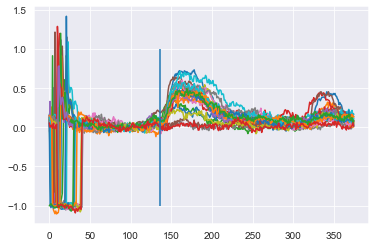

In [169]:
#extract all traces
all_traces = f.get_traces(aligned=True, trace="df")

#get mean traces across neurons
mean_traces = all_traces.mean(axis=0)

#get odor start
odor_start = f.get_param("odorStart")

#plot mean traces with odor start
plt.plot(mean_traces)
plt.vlines(odor_start[0,0], ymin=-1, ymax=1)
plt.show()

# Creating odor response matrix

In [193]:
#set time_window
window=30
start = int(odor_start[0,0])+100
time_window = [start,start + window]

#get traces in time of interest pre-post stimulus in total ca 70 frames
df_traces = f.get_traces(trace="df", time_window=time_window, aligned=True)

#order by trial: Ala, Ala, Ala, Ser, Ser, Ser, etc....
order_by_trial = list((np.array([x for x in range(24)]).reshape([3, 8]).transpose().flatten()))
reordered_df_traces = df_traces[:, :,order_by_trial]
reordered_odor_names = [f.get_odor_name(od) for od in order_by_trial]

#reshape matrix
odor_response_matrix_old = reordered_df_traces.reshape(reordered_df_traces.shape[0],reordered_df_traces.shape[1]*reordered_df_traces.shape[2])#flatten

odor_response_matrix = np.zeros_like(reordered_df_traces.reshape(reordered_df_traces.shape[0],reordered_df_traces.shape[1]*reordered_df_traces.shape[2]))
for n in range(odor_response_matrix.shape[0]):
    odor_response_matrix[n,:]=reordered_df_traces[n,:,:].transpose().flatten()


#mean odor response matrix
odor_response_matrix_mean = reordered_df_traces.mean(axis=1)


In [194]:
repeated_labels = [odor for odor in reordered_odor_names for _ in range(window+1)]
repeated_colors = [color for color in color_map for _ in range(window+1)]

(1071, 31, 24)
(1071, 31, 24)


<AxesSubplot:>

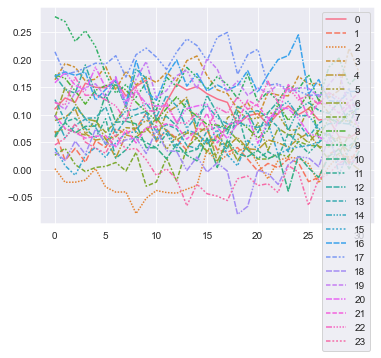

In [195]:
print(df_traces.shape)
print(reordered_df_traces.shape)
sns.lineplot(df_traces.mean(axis=0))

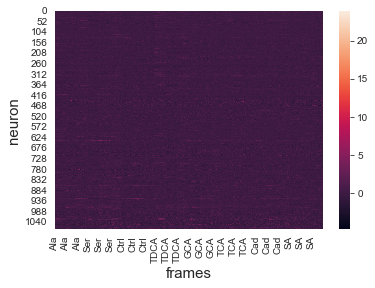

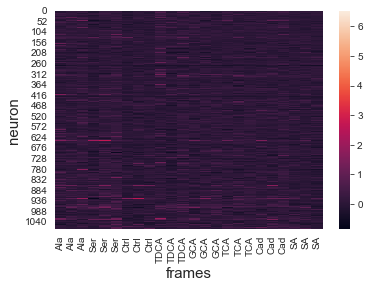

In [196]:
#ploting odor response matrix
ax= sns.heatmap(odor_response_matrix)
ax.set_xticks(np.arange(0, odor_response_matrix.shape[1], window+1))
ax.set_xticklabels(reordered_odor_names)
plt.xlabel("frames")
plt.ylabel("neuron")
plt.show()

#ploting mean odor response matrix
ax2= sns.heatmap(odor_response_matrix_mean)

ax2.set_xticklabels(reordered_odor_names)
plt.xlabel("frames")
plt.ylabel("neuron")
plt.show()


# Data cleaning

In [197]:
#Detect non-responsive cells

#Boolean list True=responsive, False=non-responsive
responsive_neurons_mask = np.full(len(f.neuron), True, dtype=bool)
for n in range(odor_response_matrix.shape[0]):

    # if neuron did not go over threshold in all the stimuli --> non-responsive
    if odor_response_matrix[n,:].all()<f.neuron.threshold[n][0]:
        responsive_neurons_mask[n]=False

print(responsive_neurons_mask)
print(odor_response_matrix[responsive_neurons_mask,:].shape)
print(responsive_neurons_mask.sum())

[ True  True  True ...  True False  True]
(1039, 744)
1039


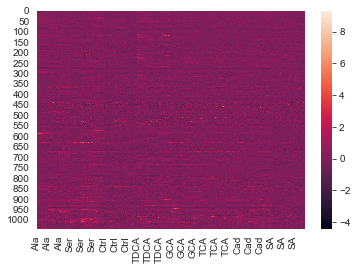

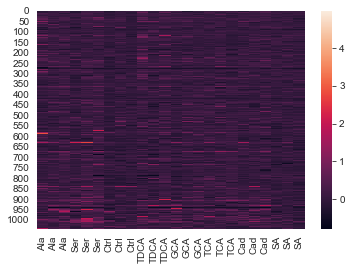

In [198]:
#Plot clean odor response matrix
ax = sns.heatmap(odor_response_matrix[responsive_neurons_mask,:])
ax.set_xticks(np.arange(0, odor_response_matrix.shape[1], window+1))
ax.set_xticklabels(reordered_odor_names)
plt.show()

#Plot clean mean odor response matrix
ax2 = sns.heatmap(odor_response_matrix_mean[responsive_neurons_mask,:])
ax2.set_xticklabels(reordered_odor_names)
plt.show()


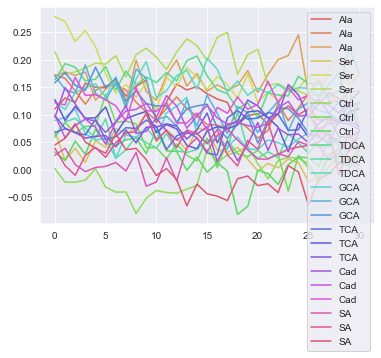

In [199]:
#Control for right reorder

mean_reordered_traces = reordered_df_traces.mean(axis=0)
for od in range(24):
    ax = sns.lineplot(data=mean_reordered_traces[:,od], label=reordered_odor_names[od], color=color_map[od])

plt.show()

# UMAP

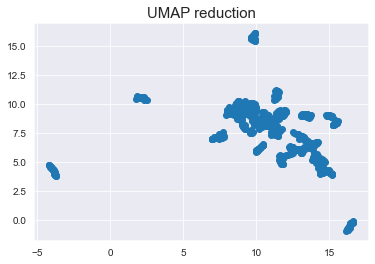

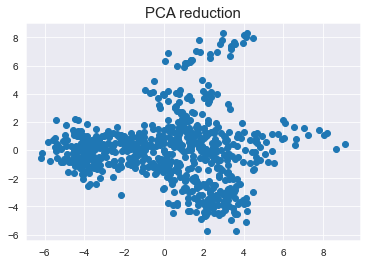

In [200]:
from sklearn.decomposition import PCA
from umap.umap_ import UMAP

#select data
data = odor_response_matrix[responsive_neurons_mask,:].transpose()
reducer = UMAP()
reduced_data = reducer.fit_transform(data)

#compared to PCA
pca = PCA(n_components=3)
pca_data = pca.fit_transform(data)

# plot UMAP
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], cmap='rainbow')
plt.title("UMAP reduction")
plt.show()

# plot PCA first 2 components
plt.scatter(pca_data[:, 0], pca_data[:, 1], cmap='rainbow')
plt.title("PCA reduction")
plt.show()

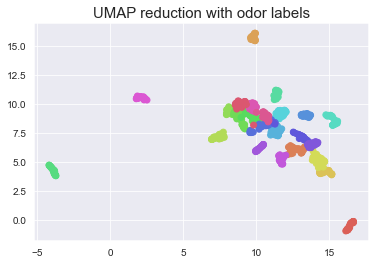

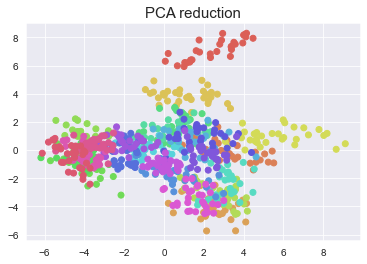

In [201]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=repeated_colors)
plt.title("UMAP reduction with odor labels")
plt.show()


# plot PCA first 2 components
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=repeated_colors)
plt.title("PCA reduction")
plt.show()

<AxesSubplot:>

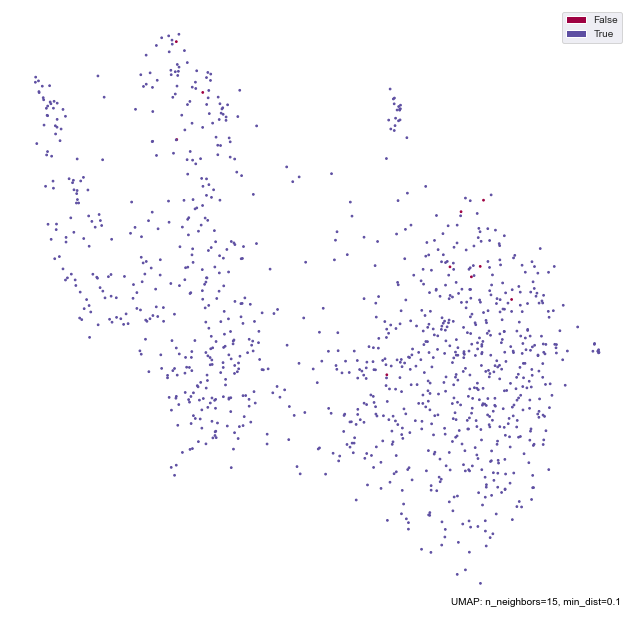

In [41]:
#Check with non-responsive neruons
#import umap.umap_ as umap
import umap.plot

mapper = reducer.fit(odor_response_matrix)
labels = responsive_neurons_mask

umap.plot.points(mapper, labels=labels)


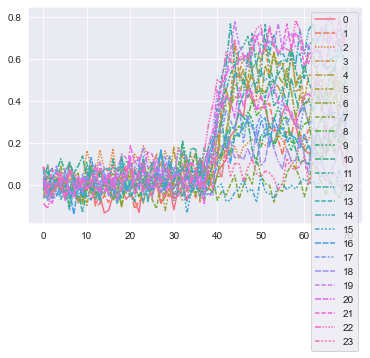

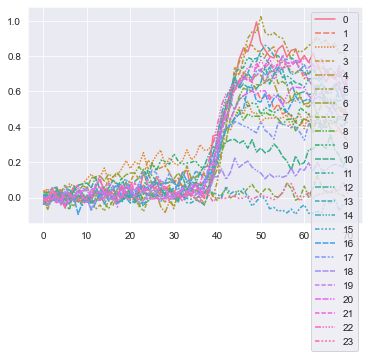

In [16]:
ax1 = sns.lineplot(data=df_traces[responsive_neurons_mask].mean(axis=0))
plt.show()

ax2 = sns.lineplot(data=df_traces[~responsive_neurons_mask].mean(axis=0))
plt.show()

In [145]:
# Normalize responses
normalized_odor_response_matrix= np.zeros_like(odor_response_matrix)
for n in range(odor_response_matrix.shape[0]):
    normalized_odor_response_matrix[n] = odor_response_matrix[n]/odor_response_matrix[n].max()

normalized_odor_response_matrix_mean= np.zeros_like(odor_response_matrix_mean)
for n in range(odor_response_matrix_mean.shape[0]):
    normalized_odor_response_matrix_mean[n] = odor_response_matrix_mean[n]/odor_response_matrix_mean[n].max()


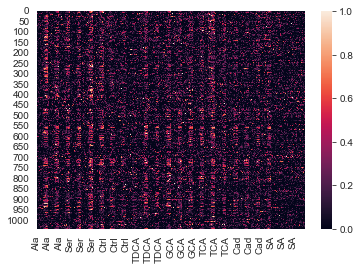

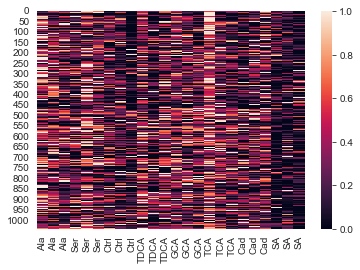

In [146]:
# Plot clean normalized responses
ax = sns.heatmap(normalized_odor_response_matrix[responsive_neurons_mask,:])
ax.collections[0].set_clim(0,1)
ax.set_xticks(np.arange(0, normalized_odor_response_matrix.shape[1], window+1))
ax.set_xticklabels(reordered_odor_names)
plt.show()

ax2 = sns.heatmap(normalized_odor_response_matrix_mean[responsive_neurons_mask,:])
ax2.collections[0].set_clim(0,1)
ax2.set_xticklabels(reordered_odor_names)
plt.show()


# Dendrogram

In [75]:

# Load the neural traces
neural_traces = f.get_traces(type="df", time_window=[120, 170])

# Define the odor stimulus
odor_stimulus = ['Ala', 'Ser', 'Ctrl', 'TDCA', 'GCA', 'TCA', 'Cad', 'SA', 'Ala', 'Ser', 'Ctrl', 'TDCA', 'GCA', 'TCA',
                 'Cad', 'SA', 'Ala', 'Ser', 'Ctrl', 'TDCA', 'GCA', 'TCA', 'Cad', 'SA']
#
# # Calculate the mean response
# mean_response = np.mean(neural_traces, axis=1)
#
# # Normalize the responses
# max_response = np.max(mean_response)
# normalized_response = mean_response / max_response
#
# # Plot the tuning curves
# for i in range(normalized_response.shape[0]):
#     plt.plot(normalized_response[i, :], label=f'neuron {i}')
# plt.xticks(range(len(odor_stimulus)), odor_stimulus)
# plt.xlabel('Odor stimulus')
# plt.ylabel('Normalized response')
#
# plt.show()

In [ ]:
# tsme?
#densUMAP

In [29]:
# Calculate tuning curves

In [76]:
# Get response from response window
odor_start = f.get_param("odorStart")
# od= 0
# response_window = [f.exp.paramsOdor.odorStart[od],f.exp.paramsOdor.odorStart[od]+80]
# response_in_window = f.get_traces(time_window=response_window, type="df")
mean_response_in_window = f.get_traces(type="df", time_window=[120, 170]).mean(axis=1)

# Measure max neuron response of each neuron within response window
max_mean_response_in_window = mean_response_in_window.max(axis=1)

# Normalize mean response by max response
normalized_mean_response = np.empty(mean_response_in_window.shape)
for n in range(f.neuron.shape[0]):
    normalized_mean_response[n, :] = mean_response_in_window[n, :] / max_mean_response_in_window[n]
    if normalized_mean_response.any() > 1:
        print(n)

# Order by trial
order_by_trial = list((np.array([x for x in range(24)]).reshape([3, 8]).transpose().flatten()))
reordered_normalized_mean_response = normalized_mean_response[:, order_by_trial]
reordered_odor_stimulus = [odor_stimulus[i] for i in order_by_trial]

normalized_mean_response = mean_response_in_window / max_mean_response_in_window[:, None]
normalized_mean_response
# Order by trial
order_by_trial = list((np.array([x for x in range(24)]).reshape([3, 8]).transpose().flatten()))
reordered_normalized_mean_response = normalized_mean_response[:, order_by_trial]
reordered_odor_stimulus = [odor_stimulus[i] for i in order_by_trial]


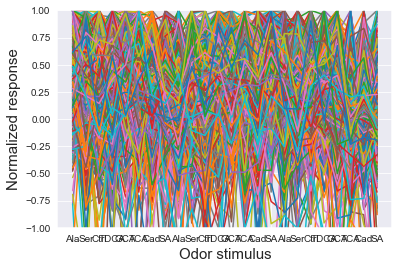

In [77]:
# Plot the tuning curves
for i in range(reordered_normalized_mean_response.shape[0]):
    plt.plot(reordered_normalized_mean_response[i, :], label=f'neuron {i}')
plt.xticks(range(len(odor_stimulus)), odor_stimulus)
plt.xlabel('Odor stimulus')
plt.ylabel('Normalized response')
plt.ylim([-1, 1])

plt.show()

Text(0.5, 0.98, 'Histogram of max df response')

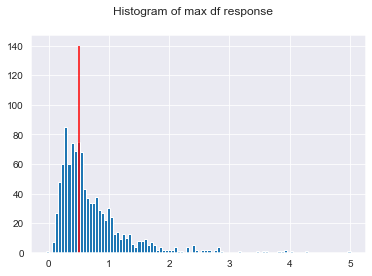

In [78]:
# Filter non responsive neurons
max_response_threshold = 0.5  #0#2
max_response_filter = [max_mean_response_in_window > max_response_threshold]
# Defining max response filter
fig, ax = plt.subplots()
ax.hist(max_mean_response_in_window, bins=100)
ax.vlines(max_response_threshold, 0, 140, colors="r")
fig.suptitle("Histogram of max df response")

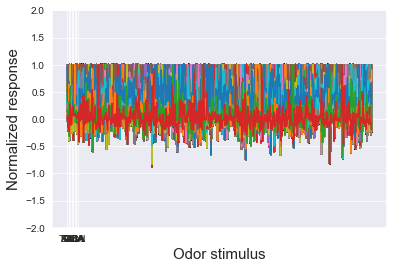

In [74]:
# Plot the tuning curves
for i in range(max_response_filter[0].shape[0]):
    plt.plot(reordered_normalized_mean_response[max_response_filter[0], :], label=f'neuron {i}')
plt.xticks(range(0, len(odor_stimulus), 3), reordered_odor_stimulus[0:len(odor_stimulus):3])
plt.xlabel('Odor stimulus')
plt.ylabel('Normalized response')
plt.ylim([-2, 2])
plt.show()

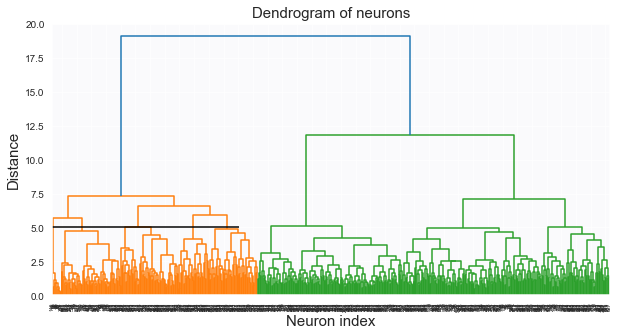

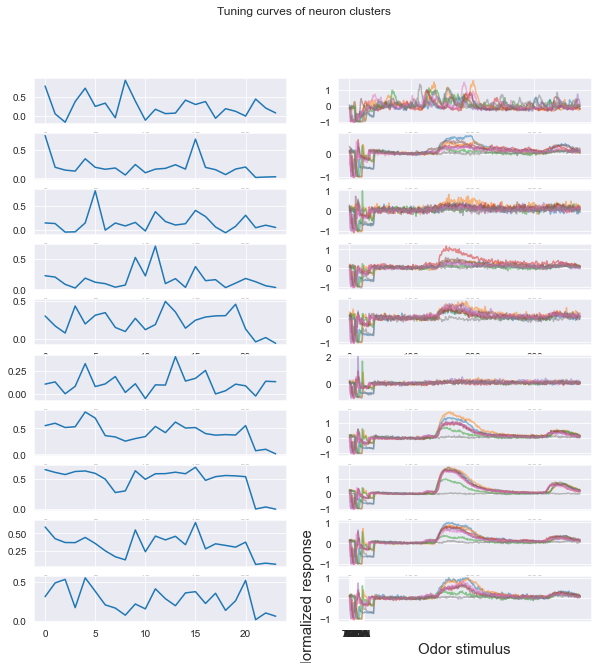

In [79]:
# Cluster neuronal responses
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Calculate the linkage matrix
Z = linkage(normalized_mean_response[max_response_filter[0], :], method='ward')
# Cluster the neurons
max_d = 5  #5#2.5 # 3.5 # maximum distance threshold
clusters = fcluster(Z, max_d, criterion='distance')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z, labels=range(Z.shape[0] + 1))
plt.hlines(max_d, 0, 2000, colors="k")
plt.xlabel('Neuron index')
plt.ylabel('Distance')
plt.title('Dendrogram of neurons')
plt.show()

#Plot the clustering results
fig, axes = plt.subplots(ncols=2, nrows=len(np.unique(clusters)), figsize=(10, 10), sharey=False, sharex = False)
# fig, axes = plt.subplots()
for cluster_idx in np.unique(clusters):
    cluster_mean = np.mean(reordered_normalized_mean_response[max_response_filter[0],:][clusters == cluster_idx], axis=0)

    axes[cluster_idx-1, 0].plot(cluster_mean, label=f'Cluster {cluster_idx}')
    plt.xticks(range(len(reordered_odor_stimulus)), reordered_odor_stimulus)
    plt.xlabel('Odor stimulus')
    plt.ylabel('Normalized response')

    # for n in range(cluster_traces.shape[0]):
    # axes[cluster_idx-1,1].plot(cluster_traces[n,:,:], label=f'Cluster {cluster_idx}', alpha=0.5)
    for od in range(8):
        cluster_traces = f.get_traces(type="df", odors=[od])[max_response_filter[0]][clusters == cluster_idx]
        axes[cluster_idx-1,1].plot(cluster_traces.mean(axis=0).mean(axis=1), label=f'Mean {f.get_odor_name(od)}', alpha=0.5)
        #plt.legend()
    fig.suptitle('Tuning curves of neuron clusters')
plt.show()


In [35]:
# Correlation of clusters

<Axes: >

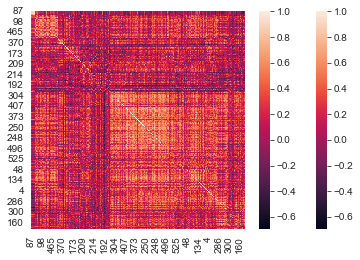

In [86]:
import seaborn as sns
import pandas as pd
data = pd.DataFrame(normalized_mean_response[max_response_filter[0]].transpose())
cor = data.corr()
sns.heatmap(cor)

idxs_for_ordered_clusters = np.argsort(clusters)

data = pd.DataFrame(normalized_mean_response[max_response_filter[0]].transpose())
cor = data[idxs_for_ordered_clusters].corr()
sns.heatmap(cor)

In [103]:
# Elbow method

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score


data = reordered_normalized_mean_response

# Finding outliers
# IQR
Q1 = [np.percentile(data[:,i], 25) for i in range(24)]
Q3 = [np.percentile(data[:,i], 75) for i in range(24)]
IQR = np.array(Q3) - np.array(Q1)

upper=Q3+1.5*IQR
lower=Q1-1.5*IQR

outliers_list = []
for t, lim in enumerate(upper):
    outliers = np.argwhere(data[:,t]>=lim)
    outliers_list.append(outliers)
for t, lim in enumerate(lower):
    outliers = np.argwhere(data[:,t]<=lim)
    outliers_list.append(outliers)

outliers_idx = np.unique(np.array([a for c in outliers_list for b in c for a in b]))


data_filtered = pd.DataFrame(data).drop(outliers_idx)

# Selecting data

data = data_filtered
data = pd.DataFrame(normalized_mean_response[max_response_filter[0]])

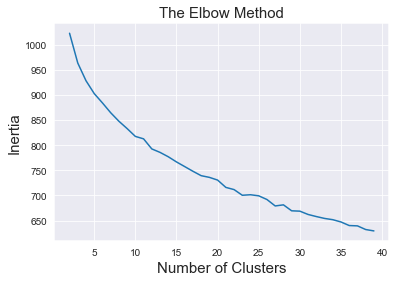

In [104]:

#calculate k using python, with the elbow method
inertia = []

# define our possible k values
possible_K_values = [i for i in range(2,40)]

# iterate through each of our values
for each_value in possible_K_values:

    # iterate through, taking each value from
    model = KMeans(n_clusters=each_value) #, init='k-means++',random_state=10)

    # fit it
    model.fit(data)

    # append the inertia to  array
    inertia.append(model.inertia_)

plt.plot(possible_K_values, inertia)
plt.title('The Elbow Method')

plt.xlabel('Number of Clusters')

plt.ylabel('Inertia')

plt.show()



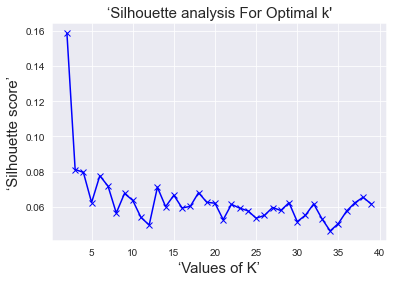

In [105]:
range_n_clusters = [i for i in range(2,40)]
silhouette_avg = []
for num_clusters in range_n_clusters:

    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(data)
    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg.append(silhouette_score(data, cluster_labels))

plt.plot(range_n_clusters,silhouette_avg,"bx-")
plt.xlabel("‘Values of K’")
plt.ylabel("‘Silhouette score’")
plt.title("‘Silhouette analysis For Optimal k'")
plt.show()

[0.26395785 0.06500846 0.05837831 0.05115639 0.04663275 0.04421406]
[18.14018407  9.00242123  8.53100403  7.9859086   7.62465015  7.42428421]


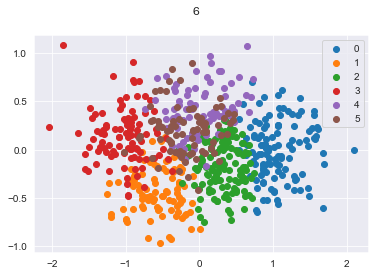

In [110]:
chosen_n_clusters = 6
# cluster with PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=chosen_n_clusters)
pca.fit(data)

df = pca.fit_transform(data)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

#Import required module
from sklearn.cluster import KMeans

#Initialize the class object
kmeans = KMeans(n_clusters= chosen_n_clusters)

#predict the labels of clusters.
label = kmeans.fit_predict(df)

#Getting unique labels
u_labels = np.unique(label)

#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.suptitle(str(chosen_n_clusters))
plt.legend()

plt.show()

Text(0.5, 0.98, '6')

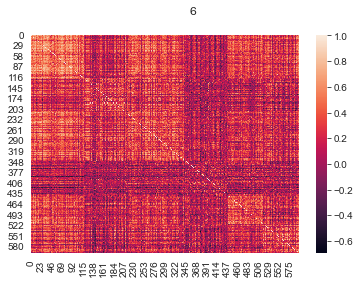

In [111]:
import seaborn as sns
import pandas as pd
idxs_for_ordered_clusters = np.argsort(label)
cor = pd.DataFrame(np.array(data)[idxs_for_ordered_clusters,:]).transpose().corr()
sns.heatmap(cor)
plt.suptitle(str(chosen_n_clusters))



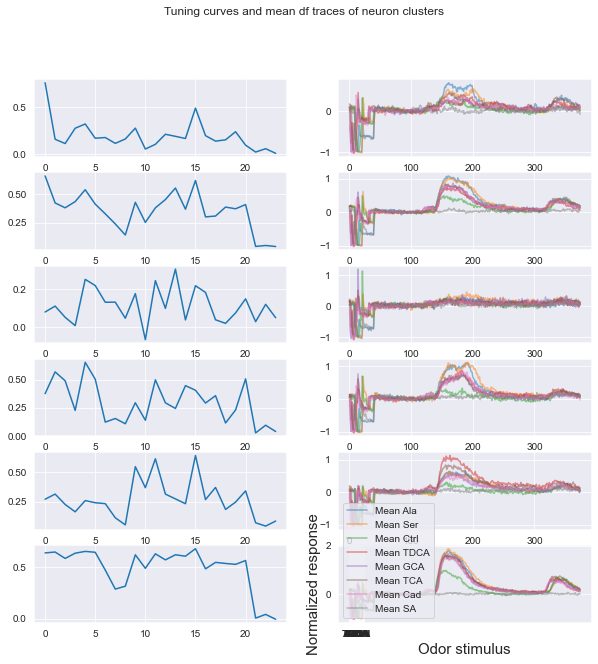

In [115]:
# Plot the clustering results
fig, axes = plt.subplots(ncols=2, nrows=len(np.unique(label)), figsize=(10, 10), sharey=False, sharex = False)
# fig, axes = plt.subplots()
#Plot tuning curves
for cluster_idx in np.unique(label):
    cluster_mean = np.mean(np.array(data)[label == cluster_idx], axis=0)[order_by_trial]

    axes[cluster_idx-1, 0].plot(cluster_mean, label=f'Cluster {cluster_idx}')
    plt.xticks(range(len(reordered_odor_stimulus)), reordered_odor_stimulus)
    plt.xlabel('Odor stimulus')
    plt.ylabel('Normalized response')

    # for n in range(cluster_traces.shape[0]):
    # axes[cluster_idx-1,1].plot(cluster_traces[n,:,:], label=f'Cluster {cluster_idx}', alpha=0.5)
    for od in range(8):
        cluster_traces = f.get_traces(type="df", odors=[od]).mean(axis=2)[max_response_filter[0]][label==cluster_idx]
        axes[cluster_idx-1,1].plot(cluster_traces.mean(axis=0), label=f'Mean {f.get_odor_name(od)}', alpha=0.5)
    # plt.ylim([-0.5,1])
    # plt.xlim([80,375])
    plt.legend()
    fig.suptitle('Tuning curves and mean df traces of neuron clusters')
plt.show()

0       [[248.39333273428446, 23.656695120468214], [24...
1       [[217.2940734750252, 22.684235481341915], [217...
2       [[238.5325919935437, 47.48195627906273], [238....
5       [[223.36222162317335, 55.747863211636314], [22...
6       [[224.87925866021038, 32.89506169216813], [224...
                              ...                        
1066    [[141.6260186072285, 291.56502391225604], [141...
1067    [[173.91692134050442, 319.402466424258], [173....
1068    [[201.9652237146638, 278.73796706849043], [201...
1069    [[231.89912624843055, 317.21913759978725], [23...
1070    [[275.2679299193997, 263.1817491941364], [275....
Name: roi_exp_position, Length: 596, dtype: object
[10 10  2  9  9  9  9  9  9  2  2  9  2  9  9  9 10  9  9  2  2  4  8  5
  2  9 10  9 10  9 10 10  5  9  7 10  2  9  7  9  9  9  9  2  5  2  9  9
  9  9  9  7 10  9  9  1  9  9  2  7  9  6  2 10  6 10  2  9  9  9  1  1
  1  8  8  9 10 10  8 10 10  4  2  9  1  1  1  1  1  2  9  2  2  9  2  2
  9  2  2  6  6 10 

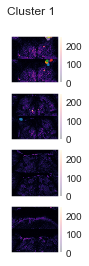

Cluster:2
Neuron2
1
Neuron19
1
Neuron20
1
Neuron28
1
Neuron43
1
Neuron44
1
Neuron64
1
Neuron94
1
Neuron112
1
Neuron116
1
Neuron154
1
Neuron165
1
Neuron173
1
Neuron200
1
Neuron213
1
Neuron217
1
Neuron218
1
Neuron220
1
Neuron225
1
Neuron228
1
Neuron229
1
Neuron239
1
Neuron267
2
Neuron285
2
Neuron288
2
Neuron309
2
Neuron310
2
Neuron311
2
Neuron317
2
Neuron320
2
Neuron322
2
Neuron332
2
Neuron333
2
Neuron338
2
Neuron339
2
Neuron353
2
Neuron386
2
Neuron412
2
Neuron525
2
Neuron574
3
Neuron579
3
Neuron584
3
Neuron686
3
Neuron717
3
Neuron731
3
Neuron743
3
Neuron819
3
Neuron851
3
Neuron854
3
Neuron858
3
Neuron859
3
Neuron861
3
Neuron863
3
Neuron867
3
Neuron884
3
Neuron900
3
Neuron904
3
Neuron964
4
Neuron965
4
Neuron986
4
Neuron1007
4
Neuron1033
4
Neuron1036
4
Neuron1049
4


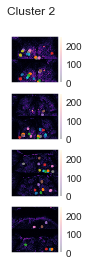

Cluster:3
Neuron315
2
Neuron358
2
Neuron367
2
Neuron368
2
Neuron376
2
Neuron404
2
Neuron462
2
Neuron604
3
Neuron697
3
Neuron747
3
Neuron777
3
Neuron783
3
Neuron797
3
Neuron810
3
Neuron827
3
Neuron860
3
Neuron870
3
Neuron993
4
Neuron1003
4
Neuron1069
4


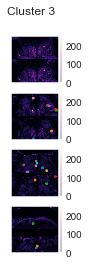

Cluster:4
Neuron45
1
Neuron199
1
Neuron243
1
Neuron327
2
Neuron373
2
Neuron418
2
Neuron446
2
Neuron463
2
Neuron501
2
Neuron518
2
Neuron529
2
Neuron530
2
Neuron581
3
Neuron594
3
Neuron614
3
Neuron639
3
Neuron670
3
Neuron685
3
Neuron692
3
Neuron698
3
Neuron741
3
Neuron746
3
Neuron760
3
Neuron799
3
Neuron808
3
Neuron839
3
Neuron848
3
Neuron849
3
Neuron888
3
Neuron899
3
Neuron945
4
Neuron947
4
Neuron949
4
Neuron967
4
Neuron975
4
Neuron979
4
Neuron982
4
Neuron987
4
Neuron991
4
Neuron1008
4
Neuron1013
4


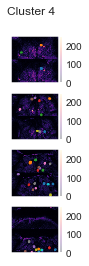

Cluster:5
Neuron52
1
Neuron87
1
Neuron115
1
Neuron273
2
Neuron296
2
Neuron443
2
Neuron448
2
Neuron476
2
Neuron562
3
Neuron601
3
Neuron620
3
Neuron701
3
Neuron702
3
Neuron716
3
Neuron755
3
Neuron758
3
Neuron832
3
Neuron838
3
Neuron840
3
Neuron865
3
Neuron879
3
Neuron889
3
Neuron992
4
Neuron1004
4
Neuron1006
4
Neuron1014
4
Neuron1015
4
Neuron1025
4
Neuron1028
4
Neuron1031
4
Neuron1047
4
Neuron1051
4
Neuron1061
4


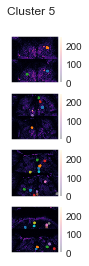

Cluster:6
Neuron160
1
Neuron168
1
Neuron232
1
Neuron236
1
Neuron271
2
Neuron302
2
Neuron366
2
Neuron406
2
Neuron437
2
Neuron439
2
Neuron440
2
Neuron450
2
Neuron451
2
Neuron459
2
Neuron464
2
Neuron495
2
Neuron496
2
Neuron515
2
Neuron523
2
Neuron533
2
Neuron535
2
Neuron539
2
Neuron540
2
Neuron548
2
Neuron555
2
Neuron556
2
Neuron596
3
Neuron672
3
Neuron689
3
Neuron691
3
Neuron694
3
Neuron696
3
Neuron706
3
Neuron707
3
Neuron709
3
Neuron712
3
Neuron713
3
Neuron775
3
Neuron836
3
Neuron869
3
Neuron871
3
Neuron873
3
Neuron881
3
Neuron942
4
Neuron966
4
Neuron989
4
Neuron997
4
Neuron1002
4
Neuron1024
4
Neuron1027
4
Neuron1034
4
Neuron1044
4


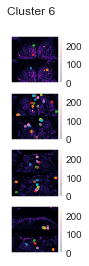

Cluster:7
Neuron91
1
Neuron102
1
Neuron133
1
Neuron157
1
Neuron255
2
Neuron263
2
Neuron283
2
Neuron314
2
Neuron347
2
Neuron352
2
Neuron375
2
Neuron379
2
Neuron399
2
Neuron403
2
Neuron426
2
Neuron507
2
Neuron558
2
Neuron571
3
Neuron612
3
Neuron618
3
Neuron619
3
Neuron630
3
Neuron631
3
Neuron635
3
Neuron642
3
Neuron650
3
Neuron656
3
Neuron657
3
Neuron722
3
Neuron744
3
Neuron750
3
Neuron754
3
Neuron796
3
Neuron803
3
Neuron812
3
Neuron864
3
Neuron924
4
Neuron961
4
Neuron968
4
Neuron971
4
Neuron977
4
Neuron988
4
Neuron1048
4


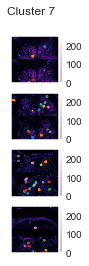

Cluster:8
Neuron48
1
Neuron185
1
Neuron186
1
Neuron190
1
Neuron272
2
Neuron275
2
Neuron279
2
Neuron281
2
Neuron293
2
Neuron319
2
Neuron329
2
Neuron341
2
Neuron342
2
Neuron378
2
Neuron380
2
Neuron381
2
Neuron382
2
Neuron413
2
Neuron419
2
Neuron421
2
Neuron422
2
Neuron431
2
Neuron432
2
Neuron444
2
Neuron479
2
Neuron482
2
Neuron483
2
Neuron500
2
Neuron522
2
Neuron524
2
Neuron527
2
Neuron541
2
Neuron553
2
Neuron560
3
Neuron564
3
Neuron570
3
Neuron572
3
Neuron577
3
Neuron590
3
Neuron599
3
Neuron600
3
Neuron602
3
Neuron608
3
Neuron617
3
Neuron621
3
Neuron640
3
Neuron641
3
Neuron644
3
Neuron652
3
Neuron658
3
Neuron676
3
Neuron681
3
Neuron723
3
Neuron736
3
Neuron737
3
Neuron738
3
Neuron742
3
Neuron751
3
Neuron752
3
Neuron782
3
Neuron784
3
Neuron786
3
Neuron787
3
Neuron788
3
Neuron789
3
Neuron802
3
Neuron813
3
Neuron814
3
Neuron829
3
Neuron842
3
Neuron857
3
Neuron862
3
Neuron883
3
Neuron885
3
Neuron886
3
Neuron894
3
Neuron895
3
Neuron897
3
Neuron898
3
Neuron911
3
Neuron912
3
Neuron913
3
Neuron9

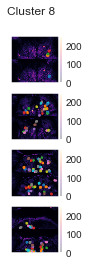

Cluster:9
Neuron5
1
Neuron6
1
Neuron7
1
Neuron8
1
Neuron17
1
Neuron18
1
Neuron21
1
Neuron29
1
Neuron30
1
Neuron31
1
Neuron40
1
Neuron41
1
Neuron73
1
Neuron75
1
Neuron77
1
Neuron88
1
Neuron100
1
Neuron104
1
Neuron108
1
Neuron110
1
Neuron111
1
Neuron117
1
Neuron120
1
Neuron125
1
Neuron127
1
Neuron128
1
Neuron136
1
Neuron140
1
Neuron145
1
Neuron150
1
Neuron158
1
Neuron176
1
Neuron178
1
Neuron179
1
Neuron187
1
Neuron201
1
Neuron214
1
Neuron219
1
Neuron227
1
Neuron249
2
Neuron250
2
Neuron252
2
Neuron254
2
Neuron259
2
Neuron264
2
Neuron270
2
Neuron274
2
Neuron277
2
Neuron287
2
Neuron292
2
Neuron300
2
Neuron301
2
Neuron306
2
Neuron313
2
Neuron328
2
Neuron357
2
Neuron360
2
Neuron362
2
Neuron390
2
Neuron391
2
Neuron392
2
Neuron393
2
Neuron398
2
Neuron401
2
Neuron407
2
Neuron408
2
Neuron430
2
Neuron435
2
Neuron480
2
Neuron481
2
Neuron486
2
Neuron488
2
Neuron489
2
Neuron490
2
Neuron502
2
Neuron510
2
Neuron513
2
Neuron514
2
Neuron526
2
Neuron551
2
Neuron559
3
Neuron588
3
Neuron593
3
Neuron605
3
Ne

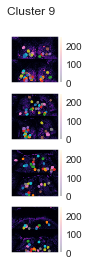

Cluster:10
Neuron0
1
Neuron1
1
Neuron39
1
Neuron74
1
Neuron76
1
Neuron78
1
Neuron79
1
Neuron92
1
Neuron134
1
Neuron167
1
Neuron171
1
Neuron188
1
Neuron189
1
Neuron191
1
Neuron195
1
Neuron237
1
Neuron238
1
Neuron258
2
Neuron278
2
Neuron280
2
Neuron316
2
Neuron318
2
Neuron337
2
Neuron346
2
Neuron348
2
Neuron369
2
Neuron385
2
Neuron466
2
Neuron484
2
Neuron491
2
Neuron497
2
Neuron499
2
Neuron504
2
Neuron517
2
Neuron519
2
Neuron536
2
Neuron538
2
Neuron567
3
Neuron569
3
Neuron592
3
Neuron598
3
Neuron615
3
Neuron616
3
Neuron680
3
Neuron688
3
Neuron718
3
Neuron721
3
Neuron739
3
Neuron778
3
Neuron792
3
Neuron793
3
Neuron806
3
Neuron822
3
Neuron823
3
Neuron850
3
Neuron853
3
Neuron856
3
Neuron875
3
Neuron890
3
Neuron891
3
Neuron903
3
Neuron906
3
Neuron910
3
Neuron919
3
Neuron920
3
Neuron957
4
Neuron978
4
Neuron990
4
Neuron994
4
Neuron1005
4
Neuron1016
4
Neuron1040
4
Neuron1053
4


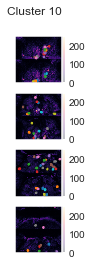

[55, 70, 71, 72, 84, 85, 86, 87, 88, 140]
(array([217.29407348,  22.68423548]), array([217.67333273,  23.1704653 ]), array([218.05259199,  24.14292494]), array([218.81111051,  25.11538458]), array([219.56962903,  26.08784422]), array([219.56962903,  26.57407404]), array([220.32814755,  27.06030386]), array([220.32814755,  27.54653368]), array([220.32814755,  28.0327635 ]), array([220.70740681,  28.0327635 ]), array([221.08666607,  28.51899332]), array([221.46592533,  29.00522314]), array([221.84518459,  29.00522314]), array([221.84518459,  29.49145296]), array([222.22444385,  29.49145296]), array([222.6037031 ,  29.97768277]), array([222.98296236,  29.97768277]), array([223.36222162,  29.97768277]), array([223.36222162,  30.46391259]), array([223.74148088,  30.46391259]), array([224.12074014,  30.46391259]), array([224.4999994 ,  30.46391259]), array([224.87925866,  30.46391259]), array([224.87925866,  30.95014241]), array([225.25851792,  30.95014241]), array([225.63777718,  30.9501424

In [116]:
# Cluster vs ROI position

filter = max_response_filter[0]
filtered_neurons = [x for x in range(f.neuron.shape[0]) if filter[x] == True]
f.neuron.roi_exp_position
filtered_neurons_pos = f.neuron.roi_exp_position[filtered_neurons]
print(filtered_neurons_pos)
print(clusters)

# Plot ROI on anatomy map
import seaborn_image as isns

for cluster_idx in np.unique(clusters):
    print(f"Cluster:{cluster_idx}")
    fig, axes = plt.subplots(nrows=4)

    for pl in range(4):
        trial = 2
        odor = 7
        anatomy_plane = f.get_anatomy_image(plane=pl + 1, trial=trial, odor=odor)
        isns.imgplot(anatomy_plane, ax=axes[pl], cmap="magma")
        # axes[pl].invert_yaxis()

    for nid in [y for x, y in enumerate(filtered_neurons) if clusters[x] == cluster_idx]:
        print(f"Neuron{nid}")
        plane = f.neuron.roi_exp_plane[nid] // 2 if (f.neuron.roi_exp_plane[nid] % 2) == 0 else f.neuron.roi_exp_plane[
                                                                                                    nid] - (
                                                                                                            f.neuron.roi_exp_plane[
                                                                                                                nid] - 1) // 2  #FIXME plane matching
        print(plane)
        roi_position = tuple(f.neuron.roi_exp_position[nid])

        x, y = zip(*roi_position)
        axes[plane - 1].plot(x, y)
    fig.suptitle(f"Cluster {cluster_idx}")
    fig.savefig(f"Neurons in cluster {cluster_idx}", dpi=300)
    plt.show()
    #
    # f.plot_ROI_on_anatomy_map(1,1)
print([x for x, y in enumerate(filtered_neurons) if clusters[x] == 1])

print(tuple(f.neuron.roi_exp_position[1]))